In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Life_Expectancy.csv')
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [3]:
#Data cleaning
df.columns=df.columns.str.strip()
df.columns = df.columns.str.replace(" " ,"_")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            124 non-null    object 
 1   Status             124 non-null    object 
 2   Adult_Mortality    124 non-null    int64  
 3   Infant_Deaths      124 non-null    int64  
 4   Hepatitis          124 non-null    int64  
 5   Measles            124 non-null    int64  
 6   BMI                124 non-null    float64
 7   Underfive_Deaths   124 non-null    int64  
 8   Polio              124 non-null    int64  
 9   Diphtheria         124 non-null    int64  
 10  HIV                124 non-null    float64
 11  GDP                124 non-null    float64
 12  Population         124 non-null    int64  
 13  Malnourished10_19  124 non-null    float64
 14  Malnourished5_9    124 non-null    float64
 15  Income_Index       124 non-null    float64
 16  Schooling          124 non

In [ ]:
#Need to change status as object to integer

In [4]:
d = pd.get_dummies(data = df['Status'], drop_first=True, prefix = 'Status')
data = pd.concat([df, d], axis=1)

In [5]:
data.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected,Status_Developing
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0,1
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5,1
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6,1
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4,1
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3,1


In [71]:
data.shape

(124, 19)

In [7]:
#Checking for Duplicate values
data.duplicated().sum()
#Checking for Nan values
data.isna().sum()
#Checking for Null values
data.isnull().sum()

0

In [8]:
#Removing Outliers
Q1 = data.quantile(0.01)
Q3 = data.quantile(0.99)
IQR = Q3 - Q1
df=data[~((data < (Q1-1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)].shape

<ipython-input-8-cc97628b3871>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=data[~((data < (Q1-1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)].shape
<ipython-input-8-cc97628b3871>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=data[~((data < (Q1-1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)].shape


In [13]:
input_cols=data.drop(['Country','Status'],axis=1)
target_cols=data['Expected']

In [14]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
input_sc=minmax.fit_transform(input_cols)
input_sc=pd.DataFrame(data=input_sc,columns=input_cols.columns)

In [15]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
input_st=standard.fit_transform(input_cols)
input_st=pd.DataFrame(data=input_st,columns=input_cols.columns)

In [86]:
#Grid search
from sklearn.linear_model import ElasticNet
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
enet_grid.fit(x_train, y_train)
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

Best parameters for ELastic-net Regression:  {'alpha': 0.1, 'l1_ratio': 0.9} 



In [85]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1)
lasso_model = lasso.fit(x_train, y_train)
train_pred = lasso_model.predict(x_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)


test_pred = lasso_model.predict(x_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

df_lasso_coeff = pd.DataFrame(data = {'Variable': x_train.columns, 'Coefficient': lasso_model.coef_})

print('Least significant variables obtained from Lasso Regression when alpha is 1:',
      df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list())

#Can remove the Status_Developing as it is leastly impacting

Root Mean Squared Error (RMSE) on training set:  4.1897
Root Mean Squared Error (RMSE) on test set:  5.1228
Least significant variables obtained from Lasso Regression when alpha is 1: ['Status_Developing']


In [69]:
#Model Evaluation using K-Fold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                # fit the model 
    return model.score(X_test_k, y_test_k)  

kf = KFold(n_splits = 5)
scores = []
for train_index, test_index in kf.split(x_train):
    x_train_k, x_test_k, y_train_k, y_test_k = x_train.iloc[train_index], x_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    scores.append(get_score(LinearRegression(), x_train_k, x_test_k, y_train_k, y_test_k))
print('All scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.8087405326051347, 0.575542932919769, 0.7995824111810221, 0.7092927706586118, 0.6824886159785026]

Minimum score obtained:  0.5755
Maximum score obtained:  0.8087
Average score obtained:  0.7151


In [72]:
#Model Evaluation using Cross validation score
scores = cross_val_score(   estimator = LinearRegression(), 
                            X = x_train, 
                            y = y_train, 
                            cv = 5, 
                            scoring = 'r2',
                         )
print('All scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.80874053 0.57554293 0.79958241 0.70929277 0.68248862]

Minimum score obtained:  0.5755
Maximum score obtained:  0.8087
Average score obtained:  0.7151


In [67]:
#Feature selection using REF
from sklearn.feature_selection import RFE
linreg_rfe = LinearRegression()
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 6)
rfe_model = rfe_model.fit(x_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = x_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['Adult_Mortality', 'BMI', 'HIV', 'GDP', 'Malnourished10_19',
       'Status_Developing'],
      dtype='object')


In [44]:
#Eliminating multicollinearity Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = input_cols.columns
vif["VIF"] = [variance_inflation_factor(input_cols.values, i) for i in range(input_cols.shape[1])]
print(vif)
incols_vif=input_cols[vif[vif['VIF']<=11]['Features']]

            Features        VIF
0    Adult_Mortality   5.049677
1                BMI  10.390855
2              Polio  35.446986
3         Diphtheria  42.508735
4                HIV   2.083466
5                GDP   1.921829
6         Population   1.436719
7  Malnourished10_19   2.837346
8       Income_Index  36.878786
9  Status_Developing   7.514046


In [59]:
x_train,x_test,y_train,y_test=train_test_split(incols_vif,target_cols,
                                                       test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((86, 7), (38, 7), (86,), (38,))

In [61]:
lin_model=LinearRegression().fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
mean_squar_error=mean_squared_error(y_pred,y_test)
print('Root Mean Squared Error',round(np.sqrt(mse_test), 4))
r2_value_rfe = lin_model.score(x_train, y_train)
print('r-squared using VIF is: ', r2_value_rfe)

Root Mean Squared Error 6.9667
r-squared using VIF is:  0.7836035835703187


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(input_cols,target_cols,
                                                       test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((86, 10), (38, 10), (86,), (38,))

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [81]:
log_model=LinearRegression().fit(x_train,y_train)
y_pred=log_model.predict(x_test)
train_pred=log_model.predict(x_train)
mean_squar_error_test=mean_squared_error(y_pred,y_test)
#mean_squar_error_train=mean_squared_error(y_pred,y_train)
mean_squar_error_train = mean_squared_error(y_train, train_pred)
print('Test Root Mean Squared Error',round(np.sqrt(mean_squar_error_test), 4))
print('Train Root Mean Squared Error',round(np.sqrt(mean_squar_error_train), 4))

Test Root Mean Squared Error 4.3405
Train Root Mean Squared Error 3.9692


In [20]:
import statsmodels.api as sm

In [21]:
BaseModel_2=['Infant_Deaths','Underfive_Deaths','Hepatitis','Malnourished5_9','Schooling','Country','Status','Expected','Measles']
input_cols=data.drop(BaseModel_2,axis=1)
target_cols=data['Expected']
#X = sm.add_constant(input_cols)
X=input_cols
y=target_cols
MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1270.
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                   6.43e-112
Time:                        17:43:31   Log-Likelihood:                         -413.00
No. Observations:                 124   AIC:                                      846.0
Df Residuals:                     114   BIC:                                      874.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((86, 10), (38, 10), (86,), (38,))

In [32]:
test_pred = MLR_model.predict(X_test)
mse_test = mean_squared_error(Y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("\n Root Mean Squared Error (RMSE) on train set: ", rmse_test)


 Root Mean Squared Error (RMSE) on train set:  6.9667


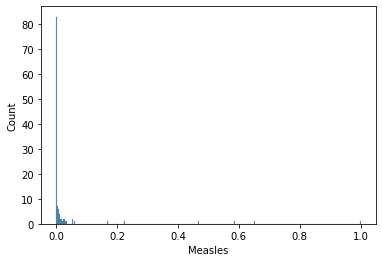

In [96]:
sns.histplot(input_sc['Measles'])
plt.show()

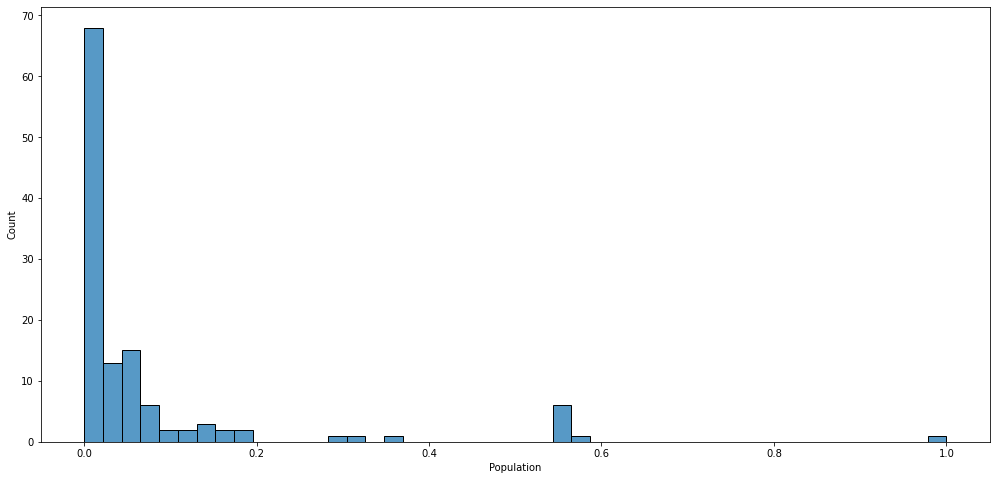

In [105]:
fig_dims = (17,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(input_st['Population'])
plt.show()

In [106]:
input_sc['Population'].describe()

count    124.000000
mean       0.075915
std        0.158850
min        0.000000
25%        0.003150
50%        0.016369
75%        0.057405
max        1.000000
Name: Population, dtype: float64

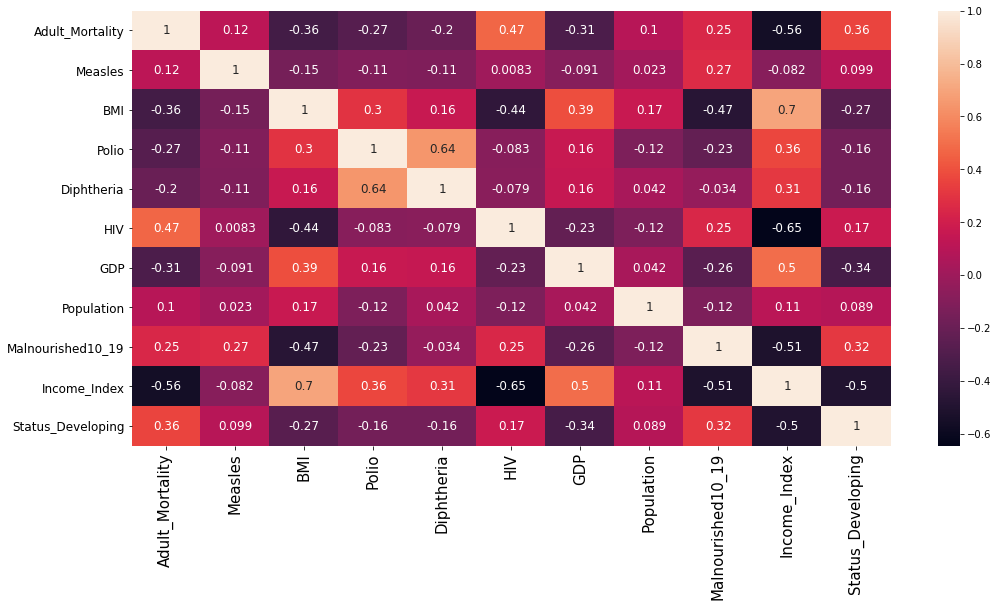

In [92]:
fig_dims = (17,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(input_cols.corr(),annot=True, annot_kws = {"size": 12})
plt.yticks(rotation = 'horizontal', fontsize = 12)
plt.xticks(fontsize = 15)
plt.show()

In [80]:
#First MLR model
input_cols=data.drop(['Country','Status'],axis=1)
target_cols=data['Expected']
X = sm.add_constant(input_cols)
y=target_cols
MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.905e+20
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:03:43   Log-Likelihood:                 2341.3
No. Observations:                 124   AIC:                            -4647.
Df Residuals:                     106   BIC:                            -4596.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.364e-12   3.23e-0

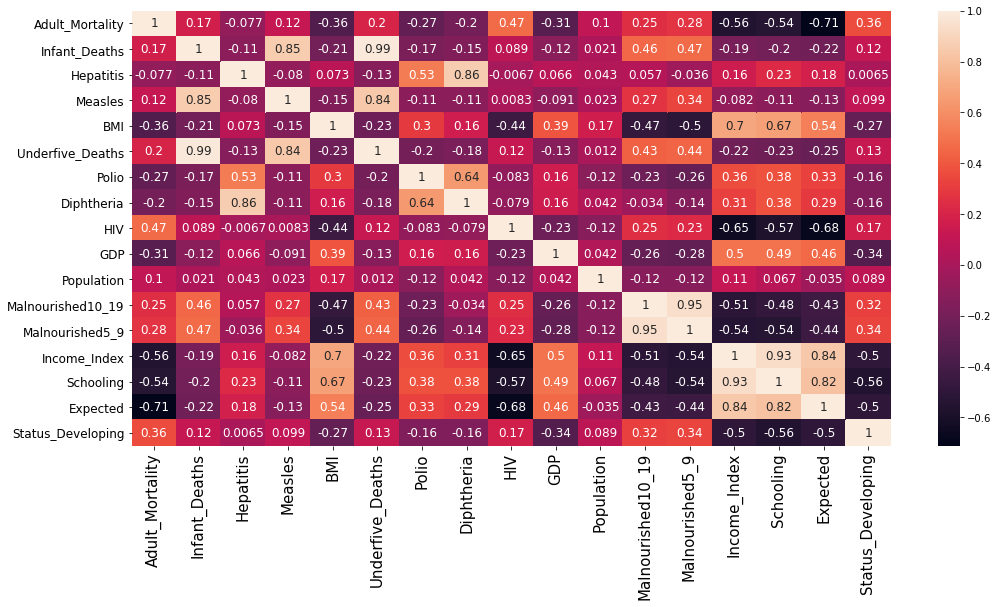

In [82]:
fig_dims = (17,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data.corr(),annot=True, annot_kws = {"size": 12})
plt.yticks(rotation = 'horizontal', fontsize = 12)
plt.xticks(fontsize = 15)
plt.show()
#[Infant_Deaths,Underfive_deaths,Hepatitis,Malnourishment5_9,Schooling]

In [30]:
data.kurt()

Adult_Mortality      -0.423463
Infant_Deaths        67.561040
Hepatitis             5.331322
Measles              34.494312
BMI                  -1.436634
Underfive_Deaths     57.042796
Polio                 6.523199
Diphtheria            8.708430
HIV                   8.929482
GDP                   6.414181
Population           11.989004
Malnourished10_19     8.408702
Malnourished5_9       7.818352
Income_Index         -0.812020
Schooling            -0.099073
Expected             -0.310490
Status_Developing     1.828157
dtype: float64

In [25]:
data.skew()

Adult_Mortality      0.588472
Infant_Deaths        7.816143
Hepatitis           -2.317231
Measles              5.635226
BMI                 -0.421571
Underfive_Deaths     7.269122
Polio               -2.633000
Diphtheria          -2.880857
HIV                  3.077187
GDP                  2.530833
Population           3.304973
Malnourished10_19    2.429036
Malnourished5_9      2.318286
Income_Index        -0.558301
Schooling           -0.109486
Expected            -0.501548
Status_Developing   -1.949084
dtype: float64

C:\Ashwin\Learning\Datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

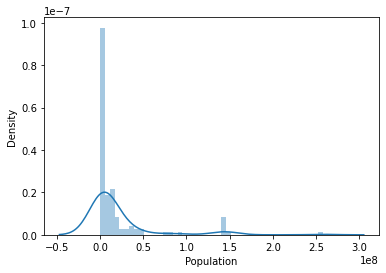

In [40]:
sns.distplot(df['Population'])

(array([103.,  10.,   0.,   3.,   0.,   7.,   0.,   0.,   0.,   1.]),
 array([8.38100000e+03, 2.58237542e+07, 5.16391274e+07, 7.74545006e+07,
        1.03269874e+08, 1.29085247e+08, 1.54900620e+08, 1.80715993e+08,
        2.06531367e+08, 2.32346740e+08, 2.58162113e+08]),
 <BarContainer object of 10 artists>)

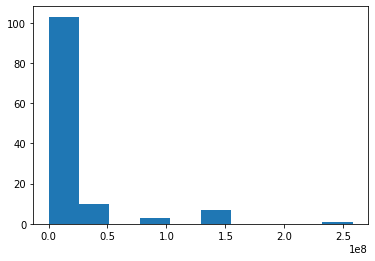

In [26]:
plt.hist(df['Population'])